# 1. Chargement de la base de donnée 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import utils
%matplotlib inline
import pickle as pkl
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')


# Importation de la librairie iads
import iads as iads

#importation de Kmoyennes
from iads import kmoyennes as km

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de clustering
from iads import clusturing as kl

# importation de utils
from iads import util_iads as ut

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
import graphviz as gv


In [4]:
import math

In [5]:
#chargement des données de notre Base
base = pd.read_csv("C:/Users/Assia bourai/Desktop/3I026/TME/Projet 3i026/BaseComplete.csv", encoding='utf8',index_col=0)


In [6]:
base.head()

,movieId,title_x,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Number of ratings,acteur,original_language,original_title,popularity,realisateur,release_date,title_modified,vote_average,vote_count
0,1,Toy Story (1995),-1,1,1,1,1,-1,-1,-1,...,0.0,Tom Hanks,en,Toy Story,22.773,John Lasseter,1995-10-30,-1,7.9,9550
1,2,Jumanji (1995),-1,1,-1,1,-1,-1,-1,-1,...,49695.0,Robin Williams,en,Jumanji,2.947,Joe Johnston,1995-12-15,-1,7.1,5594
2,3,Grumpier Old Men (1995),-1,-1,-1,-1,1,-1,-1,-1,...,22243.0,Walter Matthau,en,Grumpier Old Men,6.076,Howard Deutch,1995-12-22,-1,6.5,140
3,4,Waiting to Exhale (1995),-1,-1,-1,-1,1,-1,-1,1,...,12735.0,Whitney Houston,en,Waiting to Exhale,2.917,Forest Whitaker,1995-12-22,-1,6.1,55
4,5,Father of the Bride Part II (1995),-1,-1,-1,-1,1,-1,-1,-1,...,2756.0,Steve Martin,en,Father of the Bride Part II,6.817,NaN,1995-02-10,-1,6.1,288


# 2. Visualisation de données

### 1. Représentaion de la langue dans la base 

***On remarque que la langue la plus représentée de la base est l'anglais avec près de 20000 films dont la langue originale est l'anglais suivie de la langue française avec environs 1500 films.***

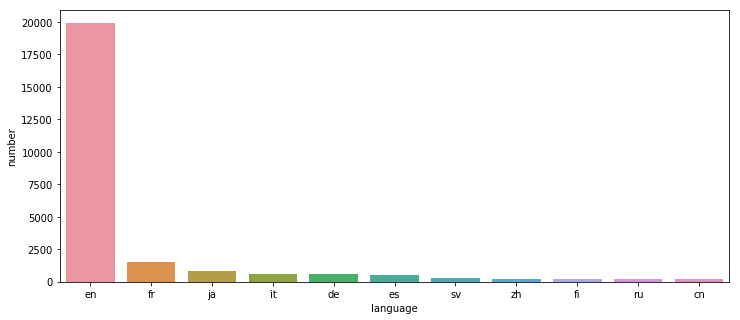

In [7]:
lang_df = pd.DataFrame(base['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
#dessiner l histogramme
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[0:11])
plt.show()

### 2. Meilleurs films
***On represente ci-dessous les 10 films les plus notés de notre base***

In [8]:
base[['title_x', 'vote_count', 'release_date']].sort_values('vote_count', ascending=False).head(10)

,title_x,vote_count,release_date
15336,Inception (2010),21060,2010-07-15
17625,"Avengers, The (2012)",18191,2012-04-25
12397,"Dark Knight, The (2008)",17998,2008-07-16
14423,Avatar (2009),17817,2009-12-10
22459,Interstellar (2014),17521,2014-11-05
23241,Guardians of the Galaxy (2014),16698,2014-07-30
2833,Fight Club (1999),15417,1999-10-15
19786,Django Unchained (2012),14902,2012-12-25
12503,Iron Man (2008),14399,2008-04-30
292,Pulp Fiction (1994),14296,1994-09-10


### 3. Acteurs avec la plus grande popularité

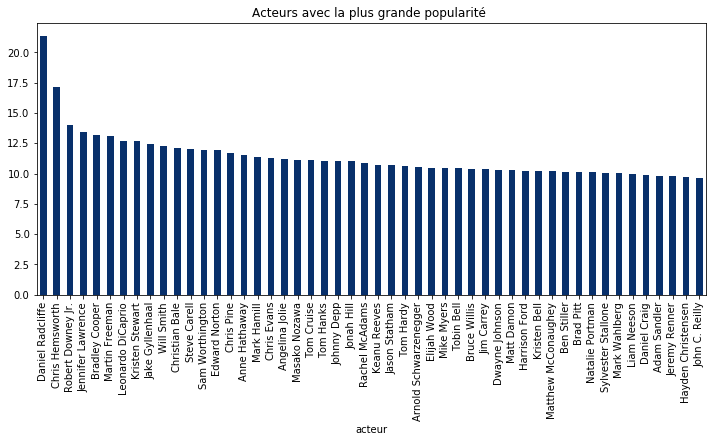

In [9]:
actor_list = base.groupby('acteur')['popularity'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = base.groupby('realisateur')['popularity'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)


plt.figure(figsize=(12,5))
plt.title("Acteurs avec la plus grande popularité ")
base[base['acteur'].isin(actor_list)].groupby('acteur')['popularity'].mean().sort_values(ascending=False).head(50).plot(kind='bar', colormap='Blues_r')
plt.show()

### 4. Réalisateurs avec la plus grande popularité

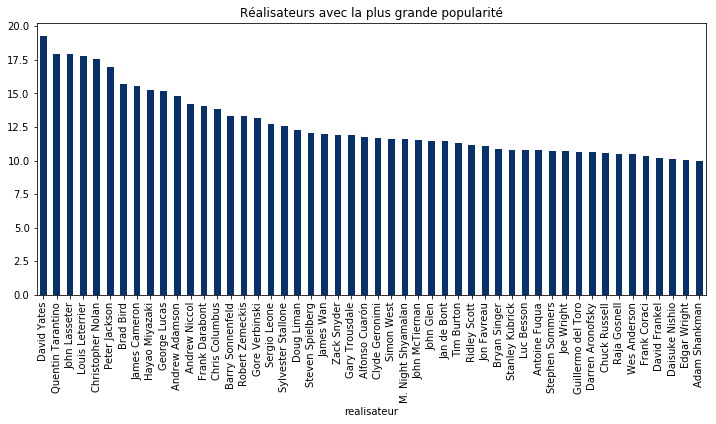

In [10]:
plt.figure(figsize=(12,5))
plt.title("Réalisateurs avec la plus grande popularité")
base[base['realisateur'].isin(director_list)].groupby('realisateur')['popularity'].mean().sort_values(ascending=False).head(50).plot(kind='bar', colormap='Blues_r')
plt.show()

### 5. Distribution des notes de films
***On represente ci-dessous la distribution des notes des films de notre base, on remarque que prés de 40% des films ont une note entre 6 et 8***

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


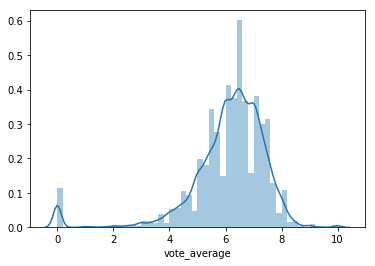

In [11]:
sns.distplot(base['vote_average'].fillna(base['vote_average'].median()))

In [12]:
base.columns


Index(['movieId', 'title_x', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'Average rating', 'Number of ratings', 'acteur',
       'original_language', 'original_title', 'popularity', 'realisateur',
       'release_date', 'title_modified', 'vote_average', 'vote_count'],
      dtype='object')

In [13]:
base.head()

,movieId,title_x,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Number of ratings,acteur,original_language,original_title,popularity,realisateur,release_date,title_modified,vote_average,vote_count
0,1,Toy Story (1995),-1,1,1,1,1,-1,-1,-1,...,0.0,Tom Hanks,en,Toy Story,22.773,John Lasseter,1995-10-30,-1,7.9,9550
1,2,Jumanji (1995),-1,1,-1,1,-1,-1,-1,-1,...,49695.0,Robin Williams,en,Jumanji,2.947,Joe Johnston,1995-12-15,-1,7.1,5594
2,3,Grumpier Old Men (1995),-1,-1,-1,-1,1,-1,-1,-1,...,22243.0,Walter Matthau,en,Grumpier Old Men,6.076,Howard Deutch,1995-12-22,-1,6.5,140
3,4,Waiting to Exhale (1995),-1,-1,-1,-1,1,-1,-1,1,...,12735.0,Whitney Houston,en,Waiting to Exhale,2.917,Forest Whitaker,1995-12-22,-1,6.1,55
4,5,Father of the Bride Part II (1995),-1,-1,-1,-1,1,-1,-1,-1,...,2756.0,Steve Martin,en,Father of the Bride Part II,6.817,NaN,1995-02-10,-1,6.1,288


# 3. Création de la base pour l'apprentissage non supervisé 
**-suppression des colonnes représentant les données catégorielles**  <br>
**-création d'une base pour le clusturing sur les genres "baseGenre"** <br>
**-création d'une base pour le clusturing sur les notes  "baseRatings"** 

In [14]:
baseNonSupervise=base.drop(columns=['movieId','title_x','original_language', 'original_title','realisateur',
       'release_date', 'title_modified','acteur'])


In [15]:

baseNonSupervise=km.normalisation(baseNonSupervise)
baseGenre=baseNonSupervise[['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']]
baseRatings=baseNonSupervise[['Average rating', 'Number of ratings',
       'popularity', 'vote_average', 'vote_count']]

In [16]:
baseNonSupervise.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Romance,Sci-Fi,Thriller,War,Western,Average rating,Number of ratings,popularity,vote_average,vote_count
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.421893,0.79,0.453466
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.784248,0.738300,0.044657,0.71,0.265622
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.642395,0.330456,0.104194,0.65,0.006648
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.630208,0.189199,0.044086,0.61,0.002612
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.572279,0.040945,0.118293,0.61,0.013675


# 4. Classification supervisée



***1) Alogithme KNN***<br>

**Classification par catégories:**<br> ***à partir des évaluations qu'un film a eu sur la base'Average rating' représentant la moyenne des notes attribuées à un film et de 'Number of ratings' représentant le nombre de notes attribuées,'vote_average' qui représente la moyenne de vote qu'on a retiré de la base de donnée film( Complémentaire ) ainsi que 'vote_count' qui représente le nombre de vote de cette base pour chaque film. On essaye de déterminer à quelle catégorie un film appartient.<br> Le genre Drama étant le plus représenté dans notre base (près de 49% des films appartiennent à cette de classe) on essayera de prédire si un film appartient à Drame ou pas. Notre modèle d 'apprentissage aura donc comme données 'Average rating', 'Number of ratings','vote_average' et  'vote_count'.***

In [17]:
X=["Average rating","Number of ratings",'vote_average', 'vote_count']
Y=["Drama"]
dataset=ls.LabeledSet(len(X))
dataset.x=( base[X].values-base[X].mean().values) / base[X].std().values #normalisation des donées 
dataset.y = base[Y].values.reshape(-1, 1)
 # la classe 
dataset.nb_examples = dataset.y.shape[0]

dataset,_=ut.split(dataset,p_train=0.01) 
dataTrain,dataTest=ut.split(dataset,p_train=0.6) 

***Validation croisée***

Moyenne du taux de bonne classification(Test) = 55 %
Ecart type =  4.825174283979027
Moyenne du taux de bonne classification(Train) = 75 %


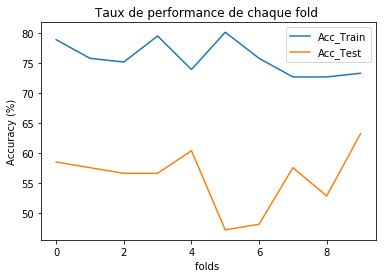

In [18]:
liste_accTe=list()
liste_accTr=list()
for i in range(10):#Découpage de la base en 10 folds 
    dataTrain,dataTest=ut.split(dataset,p_train=0.6) 
    KNN = cl.ClassifierKNN(len(X),3)
    KNN.train(dataTrain)
    liste_accTr.append(KNN.accuracy(dataTrain))
    liste_accTe.append(KNN.accuracy(dataTest))
    
print("Moyenne du taux de bonne classification(Test) = "+str(int(np.mean(liste_accTe)))+" %")
print("Ecart type = ",np.std(liste_accTe))
print("Moyenne du taux de bonne classification(Train) = "+str(int(np.mean(liste_accTr)))+" %")

ax =plt.subplot()
plt.title("Taux de performance de chaque fold " )
plt.xlabel("folds ")
plt.ylabel("Accuracy (%)")
plt.plot(liste_accTr, label="Train")
plt.plot(liste_accTe,label="Test")
plt.legend(["Acc_Train","Acc_Test"])


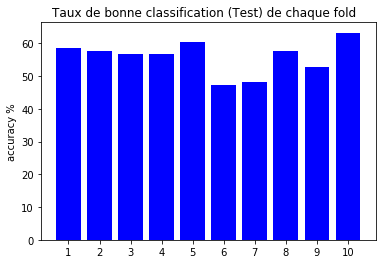

In [19]:
fig, ax = plt.subplots()
y_pos = np.arange(1,11)
plt.bar(y_pos,liste_accTe, align='center',color='blue', ecolor='black')
ax.set_xticks(y_pos)
ax.set_xticklabels(y_pos)
ax.set_ylabel('accuracy %')
plt.title("Taux de bonne classification (Test) de chaque fold  ")
plt.show()

***Comparaison la performance (train et test) de plusieurs classifieurs KNN avec différentes valeurs de k***

Moyenne de l'accuracy on train: 70.15269374819935
Moyenne de l'accuracy on test: 72.20609579100143


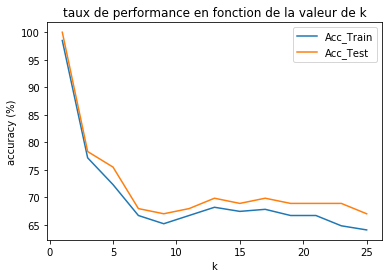

In [20]:

tab_k=[1,3,5,7,9,11,13,15,17,19,21,23,25] #liste des nombre de voisins à tester 
train_accu=[]
test_accu=[]
for i in tab_k:
    knn=cl.ClassifierKNN(2, i)
    knn.train(dataset)
    train_accu.append(knn.accuracy(dataset))
    test_accu.append(knn.accuracy(dataTest))
print("Moyenne de l'accuracy on train:",sum(train_accu)/len(train_accu))
print("Moyenne de l'accuracy on test:",sum(test_accu)/len(test_accu))  

ax=plt.subplot()
plt.title('taux de performance en fonction de la valeur de k')
plt.xlabel('k')
plt.ylabel('accuracy (%)')
plt.plot(tab_k, train_accu,label="train")#orange
plt.plot(tab_k,test_accu,label="test")#bleu
plt.legend(["Acc_Train","Acc_Test"])
    
   

***2) Classifieur Perceptron Gradient Stochastique*** 

**Au vu des résultats obtenus avec le classifieur KNN, nous allons maintenant essayer d'améliorer les poucentages d'accuracy en appliquant le perceptron gradient stochastique à nos données.**

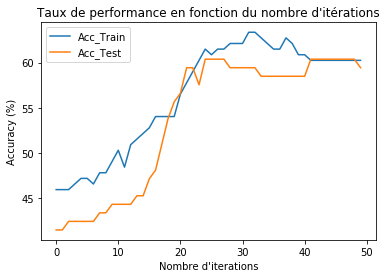

In [21]:
dataTrain,dataTest=ut.split(dataset,p_train=0.6) 
liste_accTr,liste_accTe=[],[]
PGS=cl.ClassifierGradientStochastique(len(X),0.001)
for i in range(50):
    liste_accTr.append(PGS.accuracy(dataTrain))
    liste_accTe.append(PGS.accuracy(dataTest))
    PGS.train(dataTrain)
ax =plt.subplot()
plt.title("Taux de performance en fonction du nombre d'itérations" )
plt.xlabel("Nombre d'iterations")
plt.ylabel("Accuracy (%)")
plt.plot(liste_accTr, label="Train")
plt.plot(liste_accTe,label="Test")
plt.legend(["Acc_Train","Acc_Test"])


***Validation croisée***

Moyenne du taux de bonne classification (Test) = 56 %
Ecart type =  3.706959000828018
Moyenne du taux de bonne classification(Train) = 52 %


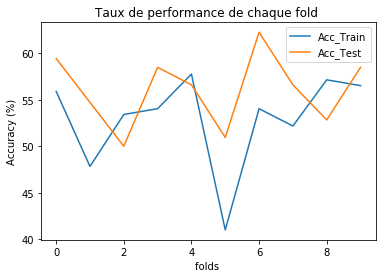

In [22]:
liste_accTe=list()
liste_accTr=list()
for i in range(10):#Découpage de la base en 10 folds 
    dataTrain,dataTest=ut.split(dataset,p_train=0.6) 
    PGS=cl.ClassifierGradientStochastique(len(X),0.001)
    PGS.train(dataTrain)
    liste_accTr.append(PGS.accuracy(dataTrain))
    liste_accTe.append(PGS.accuracy(dataTest))
ax =plt.subplot()
plt.title("Taux de performance de chaque fold " )
plt.xlabel("folds ")
plt.ylabel("Accuracy (%)")
plt.plot(liste_accTr, label="Train")
plt.plot(liste_accTe,label="Test")
plt.legend(["Acc_Train","Acc_Test"])
print("Moyenne du taux de bonne classification (Test) = "+str(int(np.mean(liste_accTe)))+" %")
print("Ecart type = ",np.std(liste_accTe))  
print("Moyenne du taux de bonne classification(Train) = "+str(int(np.mean(liste_accTr)))+" %")



***3) Classifieur Arbre de décision simple*** 

**Validation croisée**

Moyenne du taux de bonne classification (Test) = 50 %
Ecart type =  4.4397292885057045
Moyenne du taux de bonne classification (Train) = 50 %


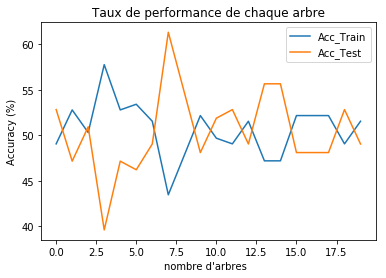

In [23]:
liste_accTe=list()
liste_accTr=list()
for i in range(20): 
    dataTrain,dataTest=ut.split(dataset,p_train=0.6) 
    ad=cl.ArbreDecision(0.0)       # initialiation d'un arbre binaire 
    ad.train(dataset)              # construction de l'arbre à partir 
    liste_accTr.append(ad.accuracy(dataTrain))
    liste_accTe.append(ad.accuracy(dataTest))
ax =plt.subplot()
plt.title("Taux de performance de chaque arbre" )
plt.xlabel("nombre d'arbres  ")
plt.ylabel("Accuracy (%)")
plt.plot(liste_accTr, label="Train")
plt.plot(liste_accTe,label="Test")
plt.legend(["Acc_Train","Acc_Test"])
print("Moyenne du taux de bonne classification (Test) = "+str(int(np.mean(liste_accTe)))+" %")
print("Ecart type = ",np.std(liste_accTe))  
print("Moyenne du taux de bonne classification (Train) = "+str(int(np.mean(liste_accTr)))+" %")


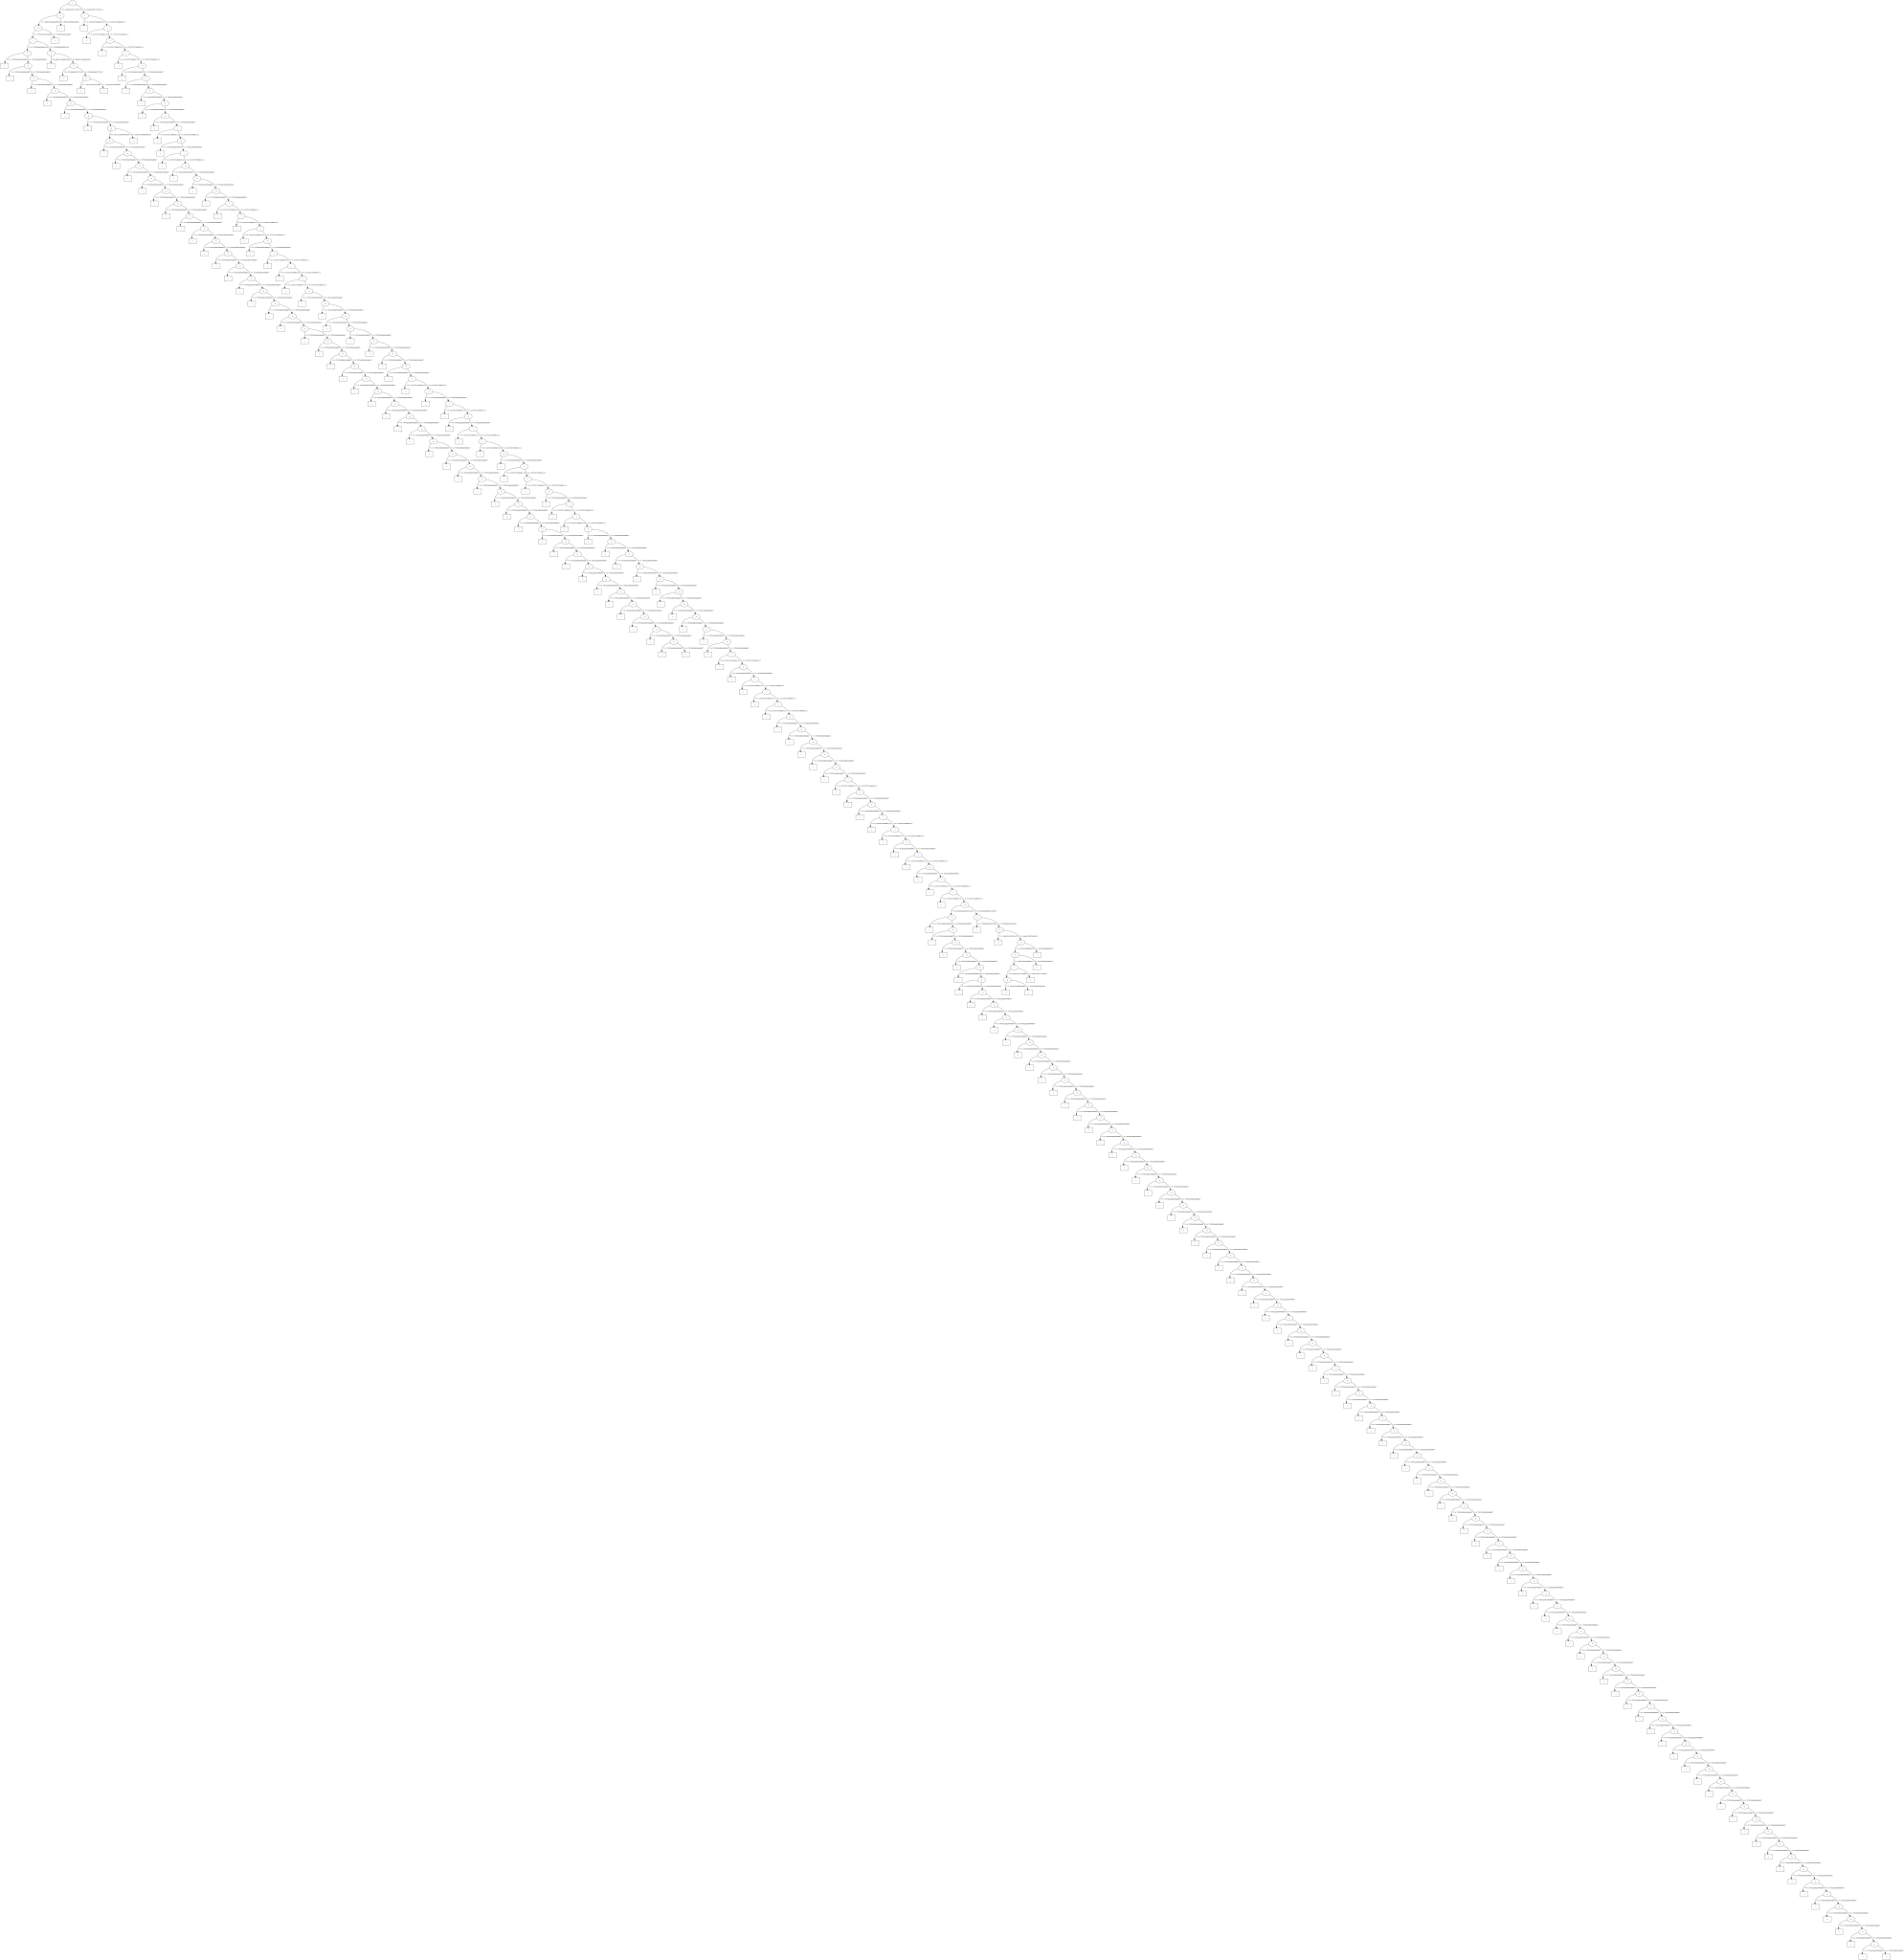

In [24]:
ad.plot()

***3) Classifieur Bagging d'arbre de décision***

**validation croisée**

Moyenne du taux de bonne classification (Test) = 49 %
Ecart type =  3.88371145518579
Moyenne du taux de bonne classification (train) = 50 %


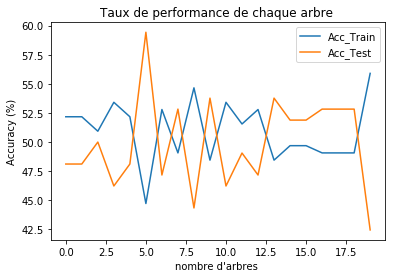

In [26]:
liste_accTe=list()
liste_accTr=list()
for i in range(20):#construction de 10 arbres  
    dataTrain,dataTest=ut.split(dataset,p_train=0.6) 
    ad_bag = cl.ClassifierBaggingTree(10,0.3,0.0,True)
    ad_bag.train(dataset)
    liste_accTr.append(ad.accuracy(dataTrain))
    liste_accTe.append(ad.accuracy(dataTest))
ax =plt.subplot()
plt.title("Taux de performance de chaque arbre " )
plt.xlabel("nombre d'arbres ")
plt.ylabel("Accuracy (%)")
plt.plot(liste_accTr, label="Train")
plt.plot(liste_accTe,label="Test")
plt.legend(["Acc_Train","Acc_Test"])
print("Moyenne du taux de bonne classification (Test) = "+str(int(np.mean(liste_accTe)))+" %")
print("Ecart type = ",np.std(liste_accTe))  
print("Moyenne du taux de bonne classification (train) = "+str(int(np.mean(liste_accTr)))+" %")


***4) Regression linéaire***

**Nous allons maintenant essayer de prédire le nombre de vote par rapport à la popularité d'un film** 

**Dans cet algorithme, la fonction r2_score() représente le coefficient de détemination en d'autres termes c'est la fonction de score de régression.<br>
le meilleur score possible est 1 et il peut être négatif car le modèle peutre être arbitrairement pire.<br>
Un modèle constant qui prédit toujours la valeur attendue de y, en négligeant les entités en entrée, obtiendrait un score de 0.**

Score de la variance : 0.53


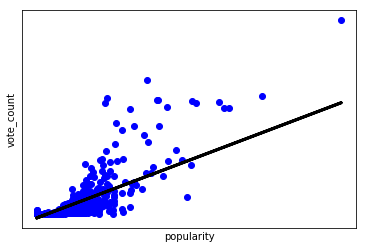

In [27]:
base=base.dropna()
# REGRESSION LINEAIRE
X=base['popularity']
Y=base['vote_count']
X_train,X_test,Y_train,Y_test=[],[],[],[]
for i in range(round(0.8*Y.shape[0])):
    X_train.append([X.iloc[i]])
    Y_train.append(Y.iloc[i])
for i in range(Y.shape[0]-round(0.8*Y.shape[0])):
    X_test.append([X.iloc[Y.shape[0]-i-1]])
    Y_test.append(Y.iloc[Y.shape[0]-i-1])
# Créer un objet de régression linéaire 
regr = linear_model.LinearRegression()
# Former le modèle en utilisant les données d'apprentissage 
regr.fit(X_train, Y_train)
# Faire des prédictions à l'aide de X_test 
predict = regr.predict(X_test)
print('Score de la variance : %.2f' % r2_score(Y_test, predict))
# Plot outputs
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, predict, color='black', linewidth=3)
plt.xlabel('popularity')
plt.ylabel('vote_count')
plt.xticks(())
plt.yticks(())
plt.savefig('lineaire regression.png', bbox_inches='tight')
plt.show()

# Classification non supervisée



***1) Clusturing hiérarchique*** 

**On regroupe les films par rapport au rapprochement des notes qu'ils ont obtenu ainsi que leurs popularité.<br>
Nous avons obtenu 4 clusters.** 

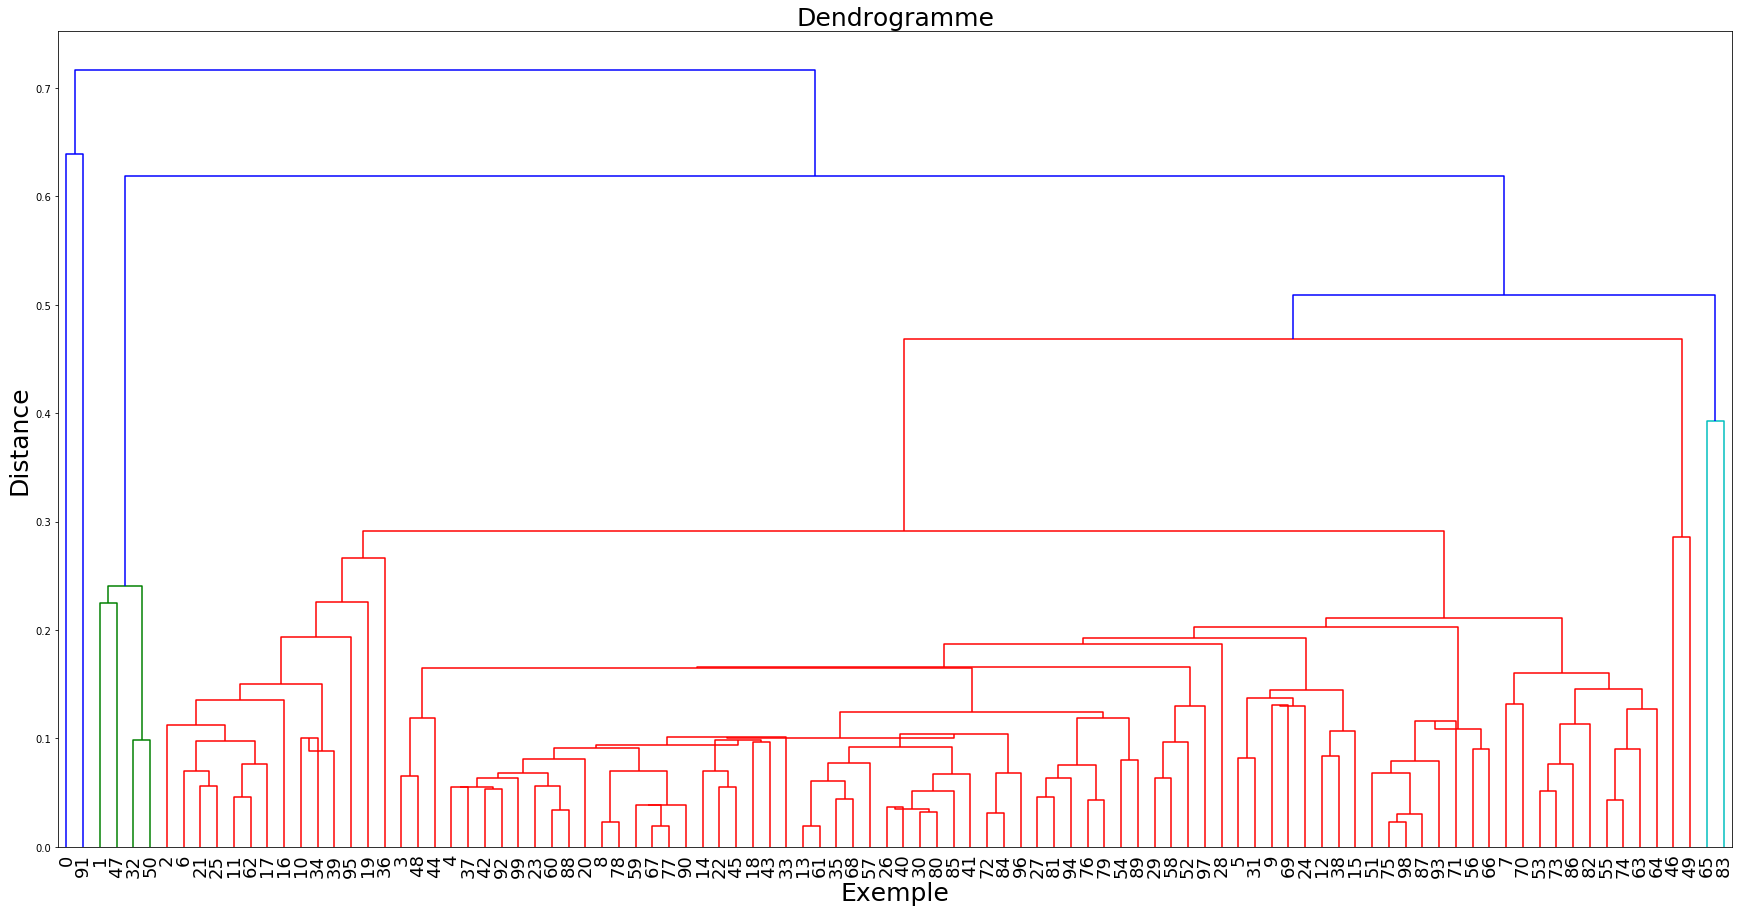

array([[1.30000000e+01, 6.10000000e+01, 1.90991623e-02, 2.00000000e+00],
       [6.70000000e+01, 7.70000000e+01, 1.96316215e-02, 2.00000000e+00],
       [7.50000000e+01, 9.80000000e+01, 2.29553199e-02, 2.00000000e+00],
       [8.00000000e+00, 7.80000000e+01, 2.32354716e-02, 2.00000000e+00],
       [1.02000000e+02, 8.70000000e+01, 3.03028335e-02, 2.00000000e+00],
       [7.20000000e+01, 8.40000000e+01, 3.10047306e-02, 2.00000000e+00],
       [3.00000000e+01, 8.00000000e+01, 3.19045841e-02, 2.00000000e+00],
       [6.00000000e+01, 8.80000000e+01, 3.43416227e-02, 2.00000000e+00],
       [2.60000000e+01, 4.00000000e+01, 3.64128154e-02, 2.00000000e+00],
       [1.08000000e+02, 1.06000000e+02, 3.49440628e-02, 2.00000000e+00],
       [5.90000000e+01, 1.01000000e+02, 3.85735477e-02, 2.00000000e+00],
       [1.10000000e+02, 9.00000000e+01, 3.83820840e-02, 2.00000000e+00],
       [7.60000000e+01, 7.90000000e+01, 4.30152135e-02, 2.00000000e+00],
       [5.50000000e+01, 7.40000000e+01, 4.31912862e

In [28]:
kl.clustering_hierarchique(baseRatings.iloc[0:100],"euclidienne")


**on regroupe les films par rapport au genre <br>
les films appartenant à la même catégorie sont regroupés dans le même cluster <br>
Nous avons obtenu 7 clusters, le plus grand compte environ 67 films.** 


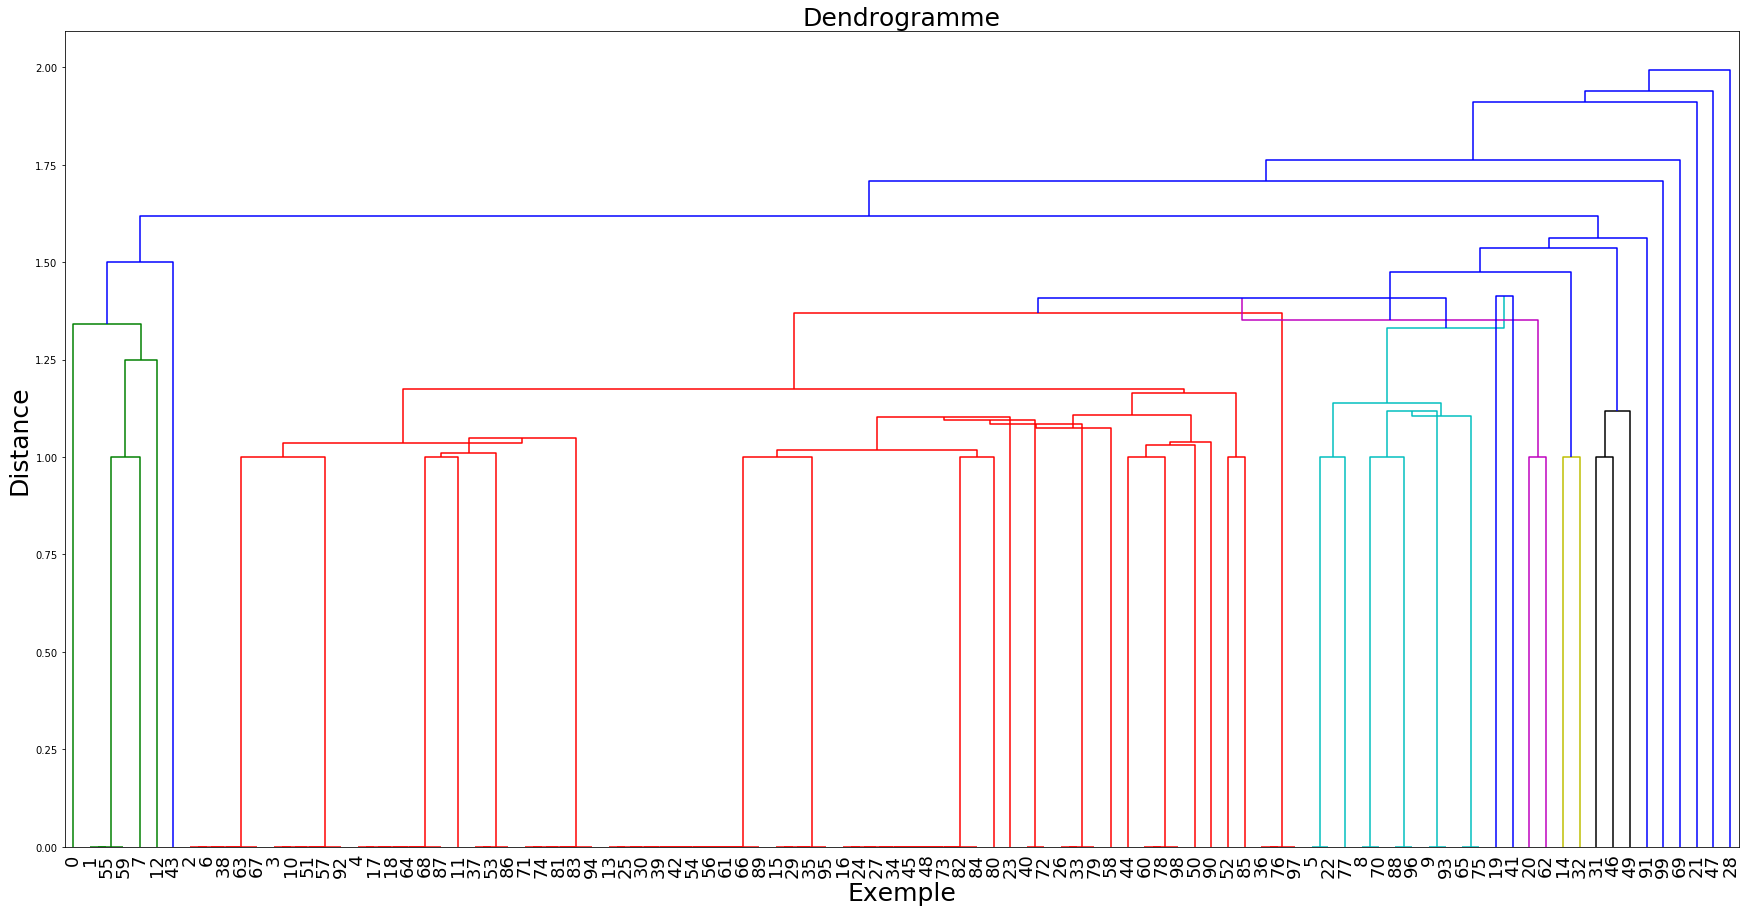

array([[  1.        ,  55.        ,   0.        ,   2.        ],
       [100.        ,  59.        ,   0.        ,   2.        ],
       [  2.        ,   6.        ,   0.        ,   2.        ],
       [102.        ,  38.        ,   0.        ,   2.        ],
       [103.        ,  63.        ,   0.        ,   2.        ],
       [104.        ,  67.        ,   0.        ,   2.        ],
       [  3.        ,  10.        ,   0.        ,   2.        ],
       [106.        ,  51.        ,   0.        ,   2.        ],
       [107.        ,  57.        ,   0.        ,   2.        ],
       [108.        ,  92.        ,   0.        ,   2.        ],
       [  4.        ,  17.        ,   0.        ,   2.        ],
       [110.        ,  18.        ,   0.        ,   2.        ],
       [111.        ,  64.        ,   0.        ,   2.        ],
       [112.        ,  68.        ,   0.        ,   2.        ],
       [113.        ,  87.        ,   0.        ,   2.        ],
       [  5.        ,  22

In [29]:
kl.clustering_hierarchique(baseGenre.iloc[0:100],"euclidienne")
